<a href="https://colab.research.google.com/github/RifatulHidayah/Project-Dibimbing/blob/main/StudentScoreDibimbing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

LOAD DATASET


In [28]:
dataset = pd.read_csv('/content/drive/MyDrive/AI/student_scores.csv')
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


DATA PREPROCESSING

In [29]:
duplicates = dataset.duplicated()
print(f"Duplicate Rows: {duplicates}")

Duplicate Rows: 0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
dtype: bool


In [30]:
missing_values = dataset.isnull()
print("Missing Values:\n", missing_values)

Missing Values:
     Hours  Scores
0   False   False
1   False   False
2   False   False
3   False   False
4   False   False
5   False   False
6   False   False
7   False   False
8   False   False
9   False   False
10  False   False
11  False   False
12  False   False
13  False   False
14  False   False
15  False   False
16  False   False
17  False   False
18  False   False
19  False   False
20  False   False
21  False   False
22  False   False
23  False   False
24  False   False


OUTLIER ANALYSIS

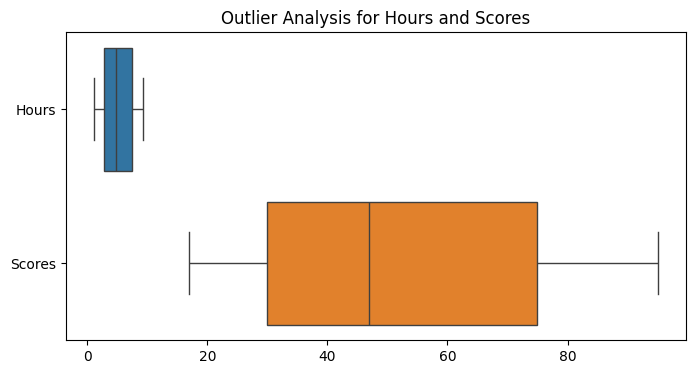

In [31]:
plt.figure(figsize=(8,4))
sns.boxplot(data=dataset, orient="h")
plt.title("Outlier Analysis for Hours and Scores")
plt.show()

DISTRIBUSI DATA

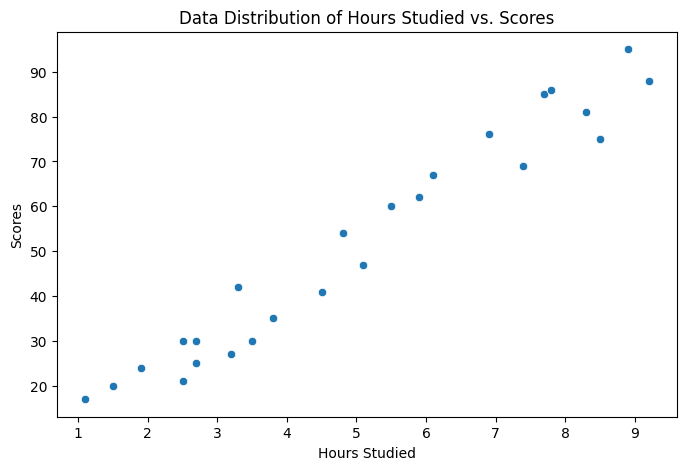

In [41]:
## Data Distribution
plt.figure(figsize=(8,5))
sns.scatterplot(x=dataset['Hours'], y=dataset['Scores'])
plt.xlabel("Hours Studied")
plt.ylabel("Scores")
plt.title("Data Distribution of Hours Studied vs. Scores")
plt.show()

FEATURE SELECTION

In [32]:
X = dataset[['Hours']]
y = dataset['Scores']


MODEL TRAINING



Train-Test Split: 80% Train / 20% Test
Linear Regression:
MSE: 18.94, R²: 0.968


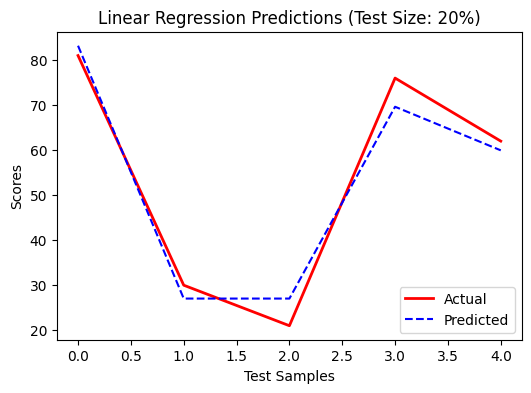


Train-Test Split: 70% Train / 30% Test
Linear Regression:
MSE: 23.62, R²: 0.949


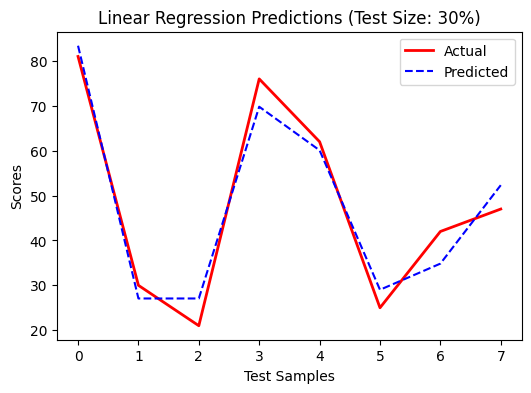


Train-Test Split: 60% Train / 40% Test
Linear Regression:
MSE: 21.82, R²: 0.951


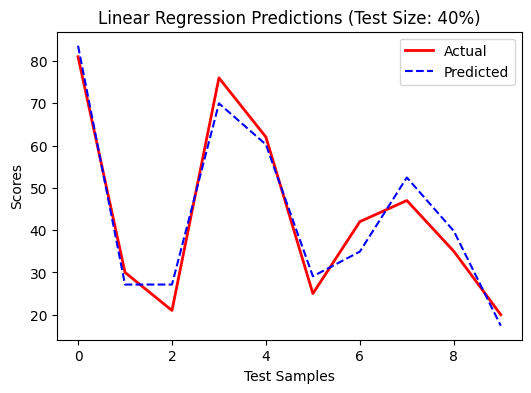

In [51]:
#LINEAR REGRESSION
splits = [0.2, 0.3, 0.4]
results = []
for test_size in splits:
    print(f"\nTrain-Test Split: {1-test_size:.0%} Train / {test_size:.0%} Test")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    y_pred_lin = lin_reg.predict(X_test)
    mse_lin = mean_squared_error(y_test, y_pred_lin)
    r2_lin = r2_score(y_test, y_pred_lin)
    results.append([test_size, "Linear Regression", mse_lin, r2_lin])

    print("Linear Regression:")
    print(f"MSE: {mse_lin:.2f}, R²: {r2_lin:.3f}")

    plt.figure(figsize=(6,4))
    plt.plot(y_test.values, color='red', label='Actual', linewidth=2)
    plt.plot(y_pred_lin, color='blue', linestyle='dashed', label='Predicted')
    plt.xlabel('Test Samples')
    plt.ylabel('Scores')
    plt.title(f'Linear Regression Predictions (Test Size: {test_size*100:.0f}%)')
    plt.legend()
    plt.show()




Decision Tree Regressor:
MSE: 31.70, R²: 0.946


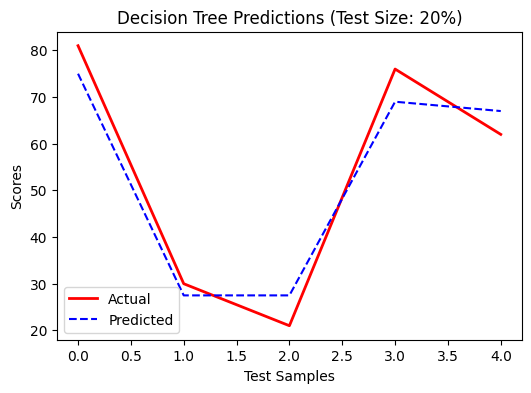


Decision Tree Regressor:
MSE: 61.25, R²: 0.867


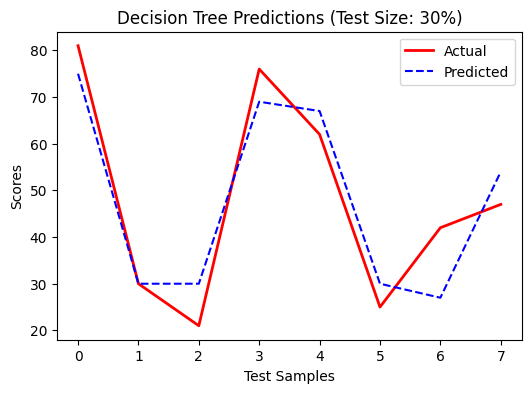


Decision Tree Regressor:
MSE: 52.40, R²: 0.883


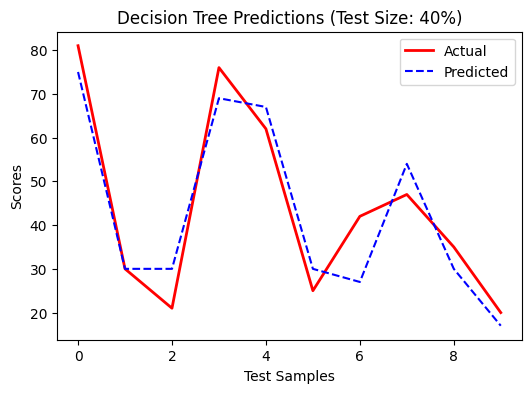

In [52]:
#Decision Tree Model
for test_size in splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    tree_reg = DecisionTreeRegressor(random_state=42)
    tree_reg.fit(X_train, y_train)
    y_pred_tree = tree_reg.predict(X_test)
    mse_tree = mean_squared_error(y_test, y_pred_tree)
    r2_tree = r2_score(y_test, y_pred_tree)
    results.append([test_size, "Decision Tree", mse_tree, r2_tree])

    print("\nDecision Tree Regressor:")
    print(f"MSE: {mse_tree:.2f}, R²: {r2_tree:.3f}")

    plt.figure(figsize=(6,4))
    plt.plot(y_test.values, color='red', label='Actual', linewidth=2)
    plt.plot(y_pred_tree, color='blue', linestyle='dashed', label='Predicted')
    plt.xlabel('Test Samples')
    plt.ylabel('Scores')
    plt.title(f'Decision Tree Predictions (Test Size: {test_size*100:.0f}%)')
    plt.legend()
    plt.show()


Random Forest Regressor:
MSE: 13.05, R²: 0.978


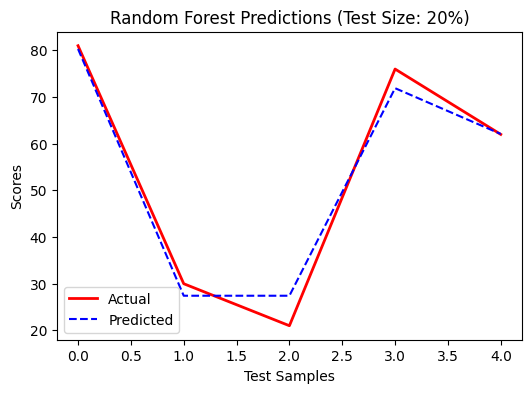


Random Forest Regressor:
MSE: 43.59, R²: 0.905


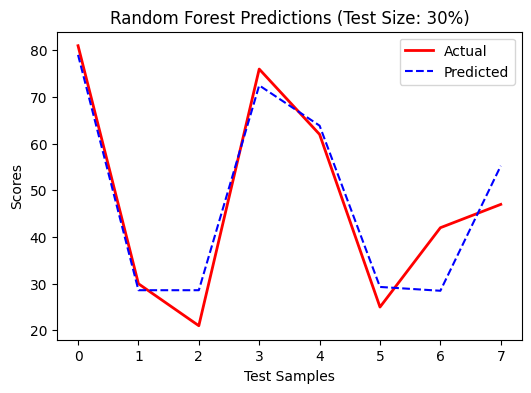


Random Forest Regressor:
MSE: 34.02, R²: 0.924


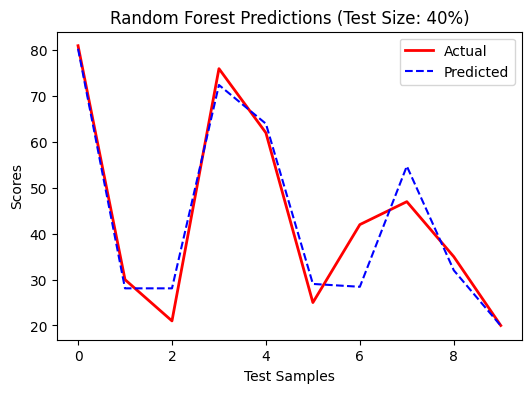

In [53]:
#Random Forest Model
for test_size in splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    rf_reg = RandomForestRegressor(random_state=42)
    rf_reg.fit(X_train, y_train)
    y_pred_rf = rf_reg.predict(X_test)
    mse_rf = mean_squared_error(y_test, y_pred_rf)
    r2_rf = r2_score(y_test, y_pred_rf)
    results.append([test_size, "Random Forest", mse_rf, r2_rf])

    print("\nRandom Forest Regressor:")
    print(f"MSE: {mse_rf:.2f}, R²: {r2_rf:.3f}")

    plt.figure(figsize=(6,4))
    plt.plot(y_test.values, color='red', label='Actual', linewidth=2)
    plt.plot(y_pred_rf, color='blue', linestyle='dashed', label='Predicted')
    plt.xlabel('Test Samples')
    plt.ylabel('Scores')
    plt.title(f'Random Forest Predictions (Test Size: {test_size*100:.0f}%)')
    plt.legend()
    plt.show()

PERBANDINGAN MODEL

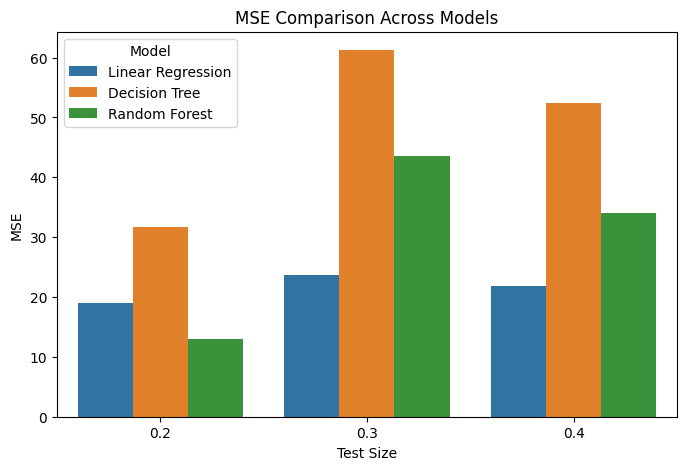

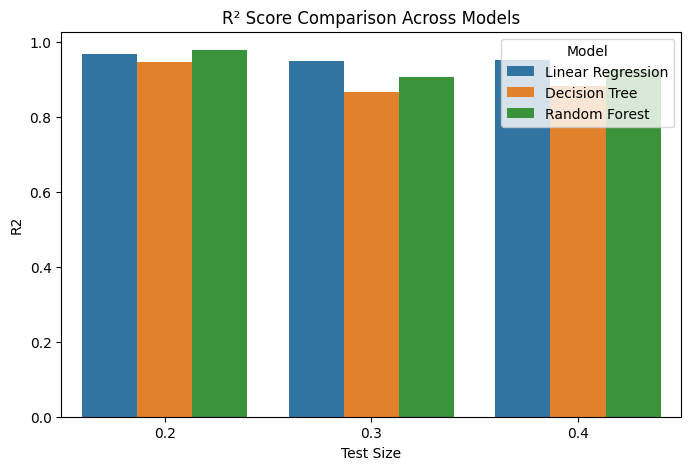

In [54]:
#comparison perfomance
results_df = pd.DataFrame(results, columns=["Test Size", "Model", "MSE", "R2"])

plt.figure(figsize=(8,5))
sns.barplot(x="Test Size", y="MSE", hue="Model", data=results_df)
plt.title("MSE Comparison Across Models")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x="Test Size", y="R2", hue="Model", data=results_df)
plt.title("R² Score Comparison Across Models")
plt.show()

KESIMPULAN

Random Forest menggunakan skenario 80%/20% adalah model paling baik (akurat), karena memiliki nilai sangat dekat dengan angka 1
Sedangkan, dari ketiganya Decision Tree kurang efektif

SARAN

Cobalah menambah eksperimen dalam feature engineering